In [32]:
%matplotlib inline
import os
import pandas as pd

DATA_PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

df = pd.read_csv(DATA_PATH, header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                        'RM', 'AGE', 'DIS', 'RAD',
                        'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [33]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

def standard_scale_value(value):
    scaler = StandardScaler()
    std_value = scaler.fit_transform(value)
    return std_value

X = df.iloc[:, :-1].values
y = df['MEDV'].values

#X = standard_scale_value(X)
#y = standard_scale_value(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.3, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#linReg.fit(X,y)
#print "[#] Steigung: %.3f" % linReg.coef_[0]
#model = RandomForestRegressor(n_estimators=1000,
                         #       criterion='mse',
                              #  random_state=1,
                              #  n_jobs=-1)
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

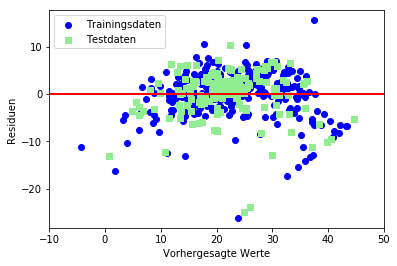

In [35]:
import matplotlib.pyplot as plt

def residual_plot(y_train, y_train_pred, y_test, y_test_pred):
    plt.scatter(y_train_pred, y_train_pred - y_train,
                c='blue', marker='o', label='Trainingsdaten')
    plt.scatter(y_test_pred, y_test_pred - y_test,
                c='lightgreen', marker='s', label='Testdaten')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Residuen')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
    plt.xlim([-10,50])
    plt.show()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
residual_plot(y_train, y_train_pred, y_test, y_test_pred)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print "R2-Trainingsdaten: %.3f, test: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print "MSE-Trainingsdaten: %.3f, test: %.3f" % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))

R2-Trainingsdaten: 0.762, test: 0.690
MSE-Trainingsdaten: 20.200, test: 25.843
